# Fluctuaciones en procesos electorales chilenos por región

## Contexto

Debido a la desigualdad de cantidad de habitantes por región en Chile, existe la creencia popular de que en procesos electorales siempre va a triunfar aquello que triunfa en la Región Metropolitana. Sin embargo, en cada proceso electoral, cada una de las 16 regiones presentes en Chile presenta variaciones de población y también de tendencias de sector político. Surge entonces la interrogante de si históricamente, en los resultados de procesos electorales, ¿Sólo valen las variaciones de la región metropolitana para marcar la tendencia nacional?

El Servicio de Votaciones Electorales (SERVEL) disponibiliza datos abiertos de cada proceso electoral, incluyendo elecciones presidenciales, municipales y plebiscitos. Dados estos datos, se busca poder afirmar o desmentir esta información con la información presente de las 16 regiones del país

## Elecciones presidenciales

En el primer proceso electoral en que se suele pensar es en el presidencial, el cual se da cada 4 años desde 2006 a la fecha. 

Se descargan los datos abiertos del SERVEL: https://www.servel.cl/servel/modulo-de-archivos/ para los procesos de elección presidencial entre 2006 y la actualidad y se estudia en detalle las variaciones de preferencias por sector político

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Circle

Desde 2006 hasta 2017

In [3]:
data = pd.read_excel('resultados_elecciones_presidenciales_ce_1989_2017_Chile.xlsx',
                     sheet_name = 'Presidenciales Chile')
data.head(5)

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Votación Presidencial,Id Región,Región,...,Sexo Mesa,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo(a),Partido,Sigla Partido,Votos Totales
0,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,FRANCISCO JAVIER ERRAZURIZ,FRANCISCO JAVIER,ERRAZURIZ,TALAVERA,HOMBRE,NaN,INDEPENDIENTE,INDEP,7065
1,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,HERNAN BUCHI,HERNAN,BUCHI,BUC,HOMBRE,NaN,INDEPENDIENTE,INDEP,11549
2,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,PATRICIO AYLWIN,PATRICIO,AYLWIN,AZOCAR,HOMBRE,SI,DEMOCRATA CRISTIANO,DC,23230
3,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS NULOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,561
4,PRESIDENCIAL,PRESIDENTE,1989-12-14,1989,1990,1994,1990 a 1994,UNICA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS EN BLANCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392


Ultimo proceso electoral presencial en 2021

In [4]:
data_2021 = pd.read_excel('Resultados_mesa_presidencial_TRICEL_2v_2021.xlsx', sheet_name = 'CHILE')
data_2021.head(5)

,Nro. Región,Región,Provincia,Circ. Senatorial,Distrito,Comuna,Circ. Electoral,Local,Nro. Mesa,Tipo de mesa,Mesas Fusionadas,Electores,Nro. en Voto,Candidato,Votos TRICEL
0,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,1.0,GABRIEL BORIC FONT,71.0
1,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,2.0,JOSE ANTONIO KAST RIST,92.0
2,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,900.0,VOTOS NULOS,1.0
3,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,20.0,M,20M,333.0,901.0,VOTOS EN BLANCO,0.0
4,1.0,DE TARAPACA,IQUIQUE,2.0,2.0,ALTO HOSPICIO,ALTO HOSPICIO,ANEXO DE COLEGIO SAN ANTONIO DE MATILLA,21.0,M,21M,340.0,1.0,GABRIEL BORIC FONT,82.0


In [5]:
data = data[(data["Votación Presidencial"] == "SEGUNDA VOTACIÓN")
            & (data["Año de Elección"] >= 2006)]
data.reset_index(inplace=True, drop=True)
data.head(5)

,Tipo de Elección,Cargo,Fecha de Elección,Año de Elección,Inicio de Período,Fin de Período,Período,Votación Presidencial,Id Región,Región,...,Sexo Mesa,Candidato (a),Nombres,Apellido Paterno,Apellido Materno,Sexo,Electo(a),Partido,Sigla Partido,Votos Totales
0,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,MICHELLE BACHELET,MICHELLE,BACHELET,JERIA,MUJER,SI,SOCIALISTA DE CHILE,PS,3910
1,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,SEBASTIAN PIÑERA,SEBASTIAN,PIÑERA,ECHENIQUE,HOMBRE,NaN,RENOVACION NACIONAL,RN,3430
2,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS NULOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195
3,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,HOMBRE,VOTOS EN BLANCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47
4,PRESIDENCIAL,PRESIDENTE,2006-01-15,2006,2006,2010,2006 a 2010,SEGUNDA VOTACIÓN,1,DE TARAPACA,...,MUJER,MICHELLE BACHELET,MICHELLE,BACHELET,JERIA,MUJER,SI,SOCIALISTA DE CHILE,PS,3170


Se agrupa por sector político: izquierda o derecha

In [6]:
data_agg_2021 = data_2021.groupby(["Nro. Región", "Región"]).apply((lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato"].isin(['GABRIEL BORIC FONT'])]["Votos TRICEL"].astype(int).sum(),
   "Votos derecha": s[s["Candidato"].isin(['JOSE ANTONIO KAST RIST'])]["Votos TRICEL"].astype(int).sum()
}))
)
data_agg_2021.reset_index(inplace = True)
data_agg_2021["% izquierda"] = round(
    data_agg_2021["Votos izquierda"] / (data_agg_2021["Votos izquierda"] + data_agg_2021["Votos derecha"]), 2)
data_agg_2021["% derecha"] = round(
    data_agg_2021["Votos derecha"] / (data_agg_2021["Votos izquierda"] + data_agg_2021["Votos derecha"]), 2)
data_agg_2021["Participación efectiva"] = data_agg_2021["Votos izquierda"] + data_agg_2021["Votos derecha"]
data_agg_2021.rename(columns = {"Nro. Región": "Id Región"}, inplace = True)
data_agg_2021["Id Región"] = data_agg_2021["Id Región"].astype(int)
data_agg_2021.insert(0, 'Año de Elección', 2021)
data_agg_2021.head(5)

C:\Users\Diego\AppData\Local\Temp\ipykernel_4432\2741349133.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_agg_2021 = data_2021.groupby(["Nro. Región", "Región"]).apply((lambda s: pd.Series({


,Año de Elección,Id Región,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2021,1,DE TARAPACA,55477,58485,0.49,0.51,113962
1,2021,2,DE ANTOFAGASTA,128009,86097,0.60,0.40,214106
2,2021,3,DE ATACAMA,76194,40235,0.65,0.35,116429
3,2021,4,DE COQUIMBO,199259,115610,0.63,0.37,314869
4,2021,5,DE VALPARAISO,544874,374058,0.59,0.41,918932


In [7]:
izq_lista = ["EDUARDO FREI", 'MICHELLE BACHELET JERIA', 'MICHELLE BACHELET',
            'ALEJANDRO  GUILLIER ALVAREZ']
der_lista = ['SEBASTIAN PIÑERA', 'SEBASTIAN PIÑERA ECHENIQUE', 'EVELYN MATTHEI FORNET']

data_agg = data.groupby(["Año de Elección", "Id Región", "Región"]).apply((lambda s: pd.Series({
   "Votos izquierda": s[s["Candidato (a)"].isin(izq_lista)]["Votos Totales"].astype(int).sum(),
   "Votos derecha": s[s["Candidato (a)"].isin(der_lista)]["Votos Totales"].astype(int).sum()
}))
)
data_agg.reset_index(inplace = True)
data_agg["% izquierda"] = round(
    data_agg["Votos izquierda"] / (data_agg["Votos izquierda"] + data_agg["Votos derecha"]), 2)
data_agg["% derecha"] = round(
    data_agg["Votos derecha"] / (data_agg["Votos izquierda"] + data_agg["Votos derecha"]), 2)
data_agg["Participación efectiva"] = data_agg["Votos izquierda"] + data_agg["Votos derecha"]
data_agg = pd.concat((data_agg, data_agg_2021))
data_agg.head(5)

C:\Users\Diego\AppData\Local\Temp\ipykernel_4432\1558685333.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_agg = data.groupby(["Año de Elección", "Id Región", "Región"]).apply((lambda s: pd.Series({


,Año de Elección,Id Región,Región,Votos izquierda,Votos derecha,% izquierda,% derecha,Participación efectiva
0,2006,1,DE TARAPACA,86120,84901,0.50,0.50,171021
1,2006,2,DE ANTOFAGASTA,115979,73399,0.61,0.39,189378
2,2006,3,DE ATACAMA,66055,43878,0.60,0.40,109933
3,2006,4,DE COQUIMBO,158908,108237,0.59,0.41,267145
4,2006,5,DE VALPARAISO,389696,384079,0.50,0.50,773775


### Participación electoral

Intuitivamente, se puede creer que debido al aumento constante de población en el país (particularmente en la región Metropolitana), existe un aumento de participación en las votaciones. Sin embargo, el gráfico muestra que para la Región Metropolitana esto no es cierto, donde en 2013 se registra una partipación electoral más baja que en los procesos anteriores. En 2021 se alcanza un peak de participación en los últimos procesos desde 2006

Text(0.5, 1.0, 'La participación en la RM fluctúa no necesariamente de forma monótona')

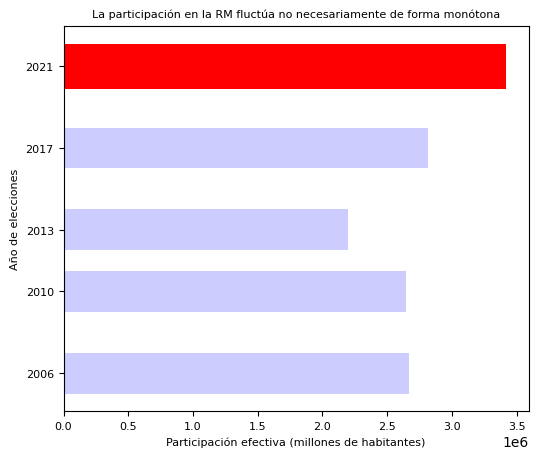

In [8]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5))

data_met = data_agg[data_agg["Id Región"] == 13].copy()

for temp_iter in data_met.groupby(["Año de Elección"]):
    temp_df = temp_iter[1]
    anio = temp_iter[0][0]
    if anio == 2021:
        ax.barh(temp_df["Año de Elección"], temp_df["Participación efectiva"], height = 2.2, color = 'r')
    else:
        ax.barh(temp_df["Año de Elección"], temp_df["Participación efectiva"],
                height = 2, color = 'b', alpha = 0.2)

ax.set_yticks(data_met["Año de Elección"].values)
ax.set_yticklabels(data_met["Año de Elección"].astype(str))
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel("Participación efectiva (millones de habitantes)", fontsize = 8)
ax.set_ylabel("Año de elecciones", fontsize = 8)
ax.set_title("La participación en la RM fluctúa no necesariamente de forma monótona", fontsize = 8)

Agregar mas aca porfa

### Resultados por tendencia política

Sabiendo los porcentajes de preferencias por región. Se puede saber en cada proceso por separado, si los resultados de **todas las regiones** tuvieron una tendencia hacia derecha o izquierda política, donde también existe la posibilidad que solo la Región Metropolitana (y otras regiones de la myor cantidad de participación) exhiba una tendencia hacia el sector ganador

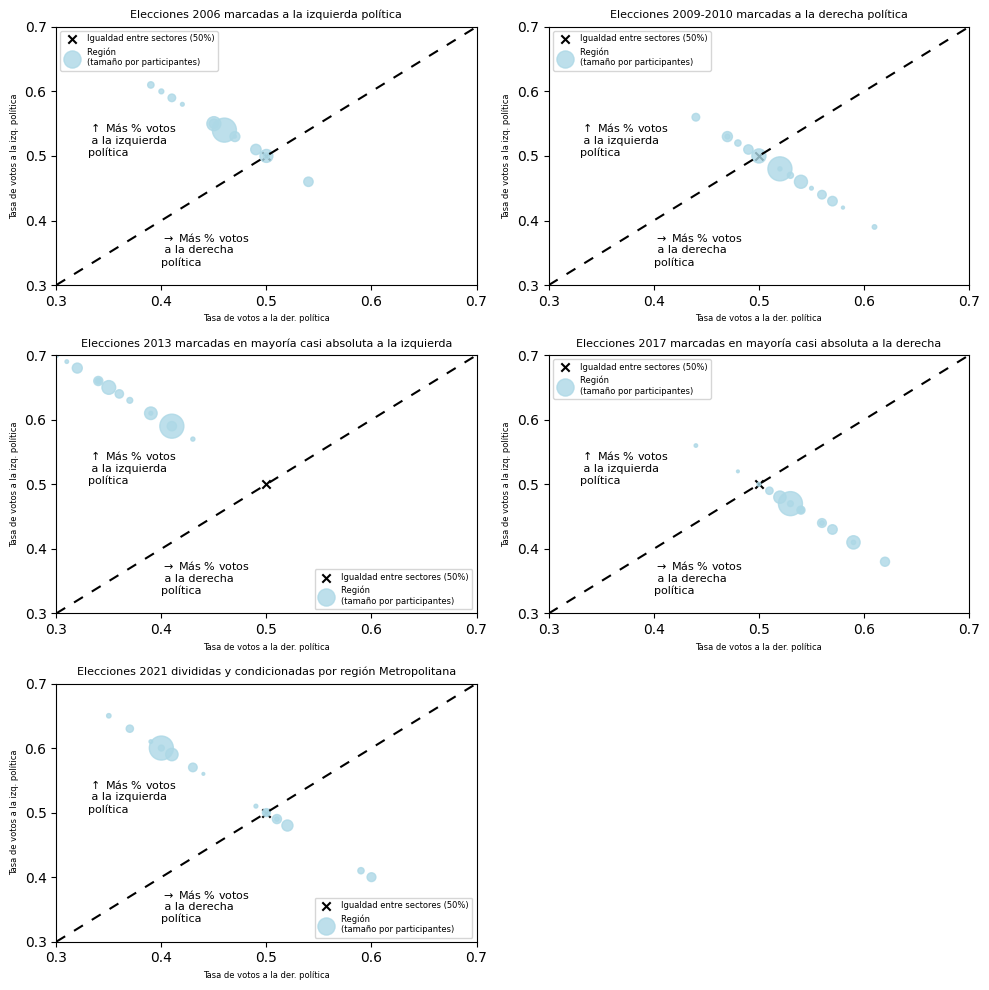

In [33]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
custom_linestyle = (0, (5, 5))  # 5 unidades de línea, 5 unidades de espacio

for (idx, temp_iter) in enumerate(data_agg.groupby(["Año de Elección"])):
    temp_df = temp_iter[1]
    anio = temp_iter[0][0]
    region = temp_df["Id Región"].unique()[0]
    
    ax[idx // 2, idx % 2].plot(np.arange(0.3, 0.8, 0.1),
        np.arange(0.3, 0.8, 0.1),
        color = 'k',
        linestyle=custom_linestyle)
    ax[idx // 2, idx % 2].scatter(0.5, 0.5, marker = 'x', color = "k", label = "Igualdad entre sectores (50%)")

    ax[idx // 2, idx % 2].scatter(temp_df["% derecha"], temp_df["% izquierda"],
            s=temp_df['Participación efectiva']/temp_df['Participación efectiva'].max()*300,
            c="lightblue", alpha = 0.8, label = "Región \n(tamaño por participantes)")
    ax[idx // 2, idx % 2].set_xlim(0.3, 0.7)
    ax[idx // 2, idx % 2].set_ylim(0.3, 0.7)
    ax[idx // 2, idx % 2].set_xticks(np.arange(0.3, 0.8, 0.1))
    ax[idx // 2, idx % 2].set_yticks(np.arange(0.3, 0.8, 0.1))
    ax[idx // 2, idx % 2].set_xlabel('Tasa de votos a la der. política', fontsize=6)
    ax[idx // 2, idx % 2].set_ylabel('Tasa de votos a la izq. política', fontsize=6)

    ax[idx // 2, idx % 2].text(0.33, 0.5, r'$\uparrow$ Más % votos'+
                               '\n a la izquierda\npolítica', fontsize=8)
    ax[idx // 2, idx % 2].text(0.4, 0.33, r'$\rightarrow$ Más % votos'+
                               '\n a la derecha\npolítica', fontsize=8)
    ax[idx // 2, idx % 2].add_patch(Circle((-0.5, 7), 0.03, color='none', ec='grey'))
    ax[idx // 2, idx % 2].legend(fontsize = 6)

ax[0, 0].set_title("Elecciones 2006 marcadas a la izquierda política", fontsize = 8)
ax[0, 1].set_title("Elecciones 2009-2010 marcadas a la derecha política", fontsize = 8)
ax[1, 0].set_title("Elecciones 2013 marcadas en mayoría casi absoluta a la izquierda", fontsize = 8)
ax[1, 1].set_title("Elecciones 2017 marcadas en mayoría casi absoluta a la derecha", fontsize = 8)
ax[2, 0].set_title("Elecciones 2021 divididas y condicionadas por región Metropolitana", fontsize = 8)
ax[2, 1].set_axis_off() #ocultar ejes originales
fig.tight_layout()

En el gráfico mostrado arriba, se puede ver que en general, en todos los procesos electorales cuando un sector (derecha o izquierda) triunfa, en realidad suele triunfar en todas las regiones. Se puede observar que:

- En el proceso de 2013 todas las regiones sin excepción tuvieron inclinación por el sector de izquierda política, donde la RM fue incluso una de las que mostró más similitud entre ambos sectores.
- En el proceso de 2017, se puede observar una inversión en la tendencia hacia el sector de derecha política, donde nuevamente la RM fue una de las que mostró más similitud entre ambos sectores.
- El único proceso que puede dar cuenta una gran influencia de la RM fue el de 2021, donde esta regióm tiende a ser la con mayor inclinación hacia el sector de izquierda.

Text(0.5, 1.0, 'Elecciones 2021')

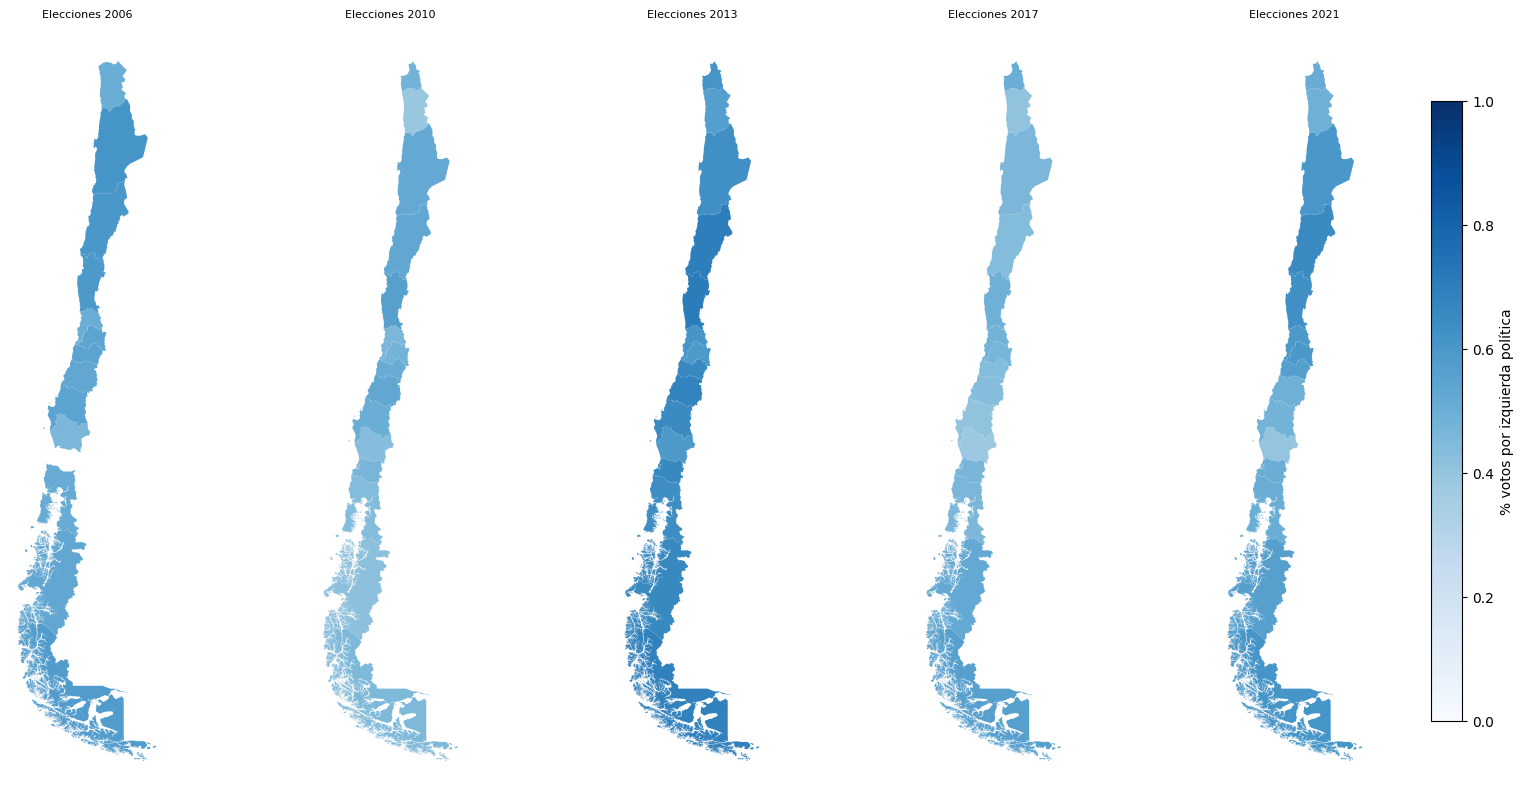

In [40]:
# https://github.com/niclabs/maps/blob/master/regiones
gdf = gpd.read_file("regiones/regiones.shp")
gdf['Id Región'] = gdf["COD_REGI"].astype(int)

gdf= gdf.merge(data_agg, on = 'Id Región')

fig, ax = plt.subplots(1, 5, figsize=(20, 10))

for (idx, temp_iter) in enumerate(gdf.groupby(["Año de Elección"])):
    temp_df = temp_iter[1]
    anio = temp_iter[0][0]


    temp_df.plot(column='% izquierda', ax=ax[idx], legend=False,
                    legend_kwds={'label': "% izquierda",
                                'orientation': "horizontal"},
                    cmap='Blues', vmin=0, vmax=1)

    #region_destacada = gdf_2017[gdf_2017['Región'] == 13]  # Cambia 'nombre' por el nombre real de la columna
    #region_destacada.plot(ax=ax, color='red', edgecolor='black')

    ax[idx].set_axis_off() #ocultar ejes originales

# Agregar el colorbar de forma manual
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])  # Esto es para evitar un warning
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('% votos por izquierda política')  # Etiqueta para el colorbar

ax[0].set_title("Elecciones 2006", fontsize = 8)
ax[1].set_title("Elecciones 2010", fontsize = 8)
ax[2].set_title("Elecciones 2013", fontsize = 8)
ax[3].set_title("Elecciones 2017", fontsize = 8)
ax[4].set_title("Elecciones 2021", fontsize = 8)


Text(2016, 0.3, 'Aumenta en todas\nlas regiones')

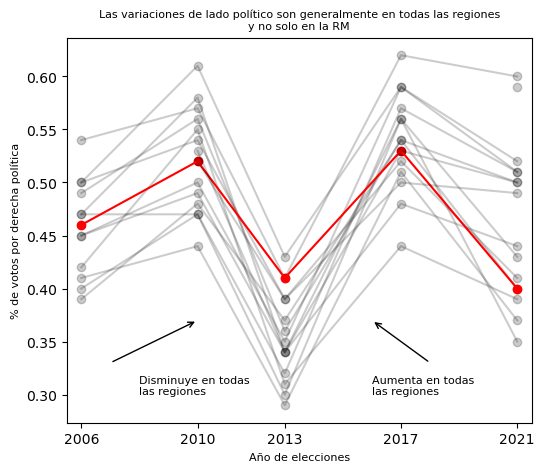

In [18]:
fig, ax = plt.subplots(1, 1, figsize = (6, 5))
for temp_iter in data_agg.groupby(["Id Región"]):
  temp_df = temp_iter[1]
  region = temp_iter[0][0]

  if region == 13:
    ax.plot(temp_df["Año de Elección"], temp_df["% derecha"], alpha = 1, color = 'r')
    ax.scatter(temp_df["Año de Elección"], temp_df["% derecha"], alpha = 1, color = 'r')

  else:
    ax.plot(temp_df["Año de Elección"], temp_df["% derecha"], alpha = 0.2, color = 'k')
    ax.scatter(temp_df["Año de Elección"], temp_df["% derecha"], alpha = 0.2, color = 'k')


  ax.set_xticks([2006, 2010, 2013, 2017, 2021])
  ax.set_xticklabels(["2006", "2010", "2013", "2017", "2021"])
  ax.set_xlim(2005.5, 2021.5)
  ax.set_xlabel("Año de elecciones", fontsize = 8)
  ax.set_ylabel("% de votos por derecha política", fontsize = 8)
ax.set_title("Las variaciones de lado político son generalmente en todas las regiones\ny no solo en la RM",
             fontsize = 8)
ax.annotate('', xy=(2010, 0.37), xytext=(2007, 0.33),
            arrowprops=dict(arrowstyle='->', lw=1, color='black'))
ax.annotate('', xy=(2016, 0.37), xytext=(2018, 0.33),
            arrowprops=dict(arrowstyle='->', lw=1, color='black'))
ax.text(2008, 0.3, 'Disminuye en todas\nlas regiones', fontsize=8)
ax.text(2016, 0.3, 'Aumenta en todas\nlas regiones', fontsize=8)

Si se observan los procesos juntos, se puede observar que en general a través de los años existe una transición intercalada de sector político en las preferencias. Al ocurrir una transición de izquierda a derecha o viceversa, en general **el cambio de preferencia es en todas las regiones**